In [1]:
import os, librosa, librosa.display
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sys

from IPython.display import Audio

sys.path.append('..')
audio_root_folder = '../archive/data'

In [2]:
labels_csv = os.path.join(audio_root_folder, 'features_30_sec.csv')
df = pd.read_csv(labels_csv, header=0)
df.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
num_audios = len(df['filename'])
labels = df['label'].unique()
num_labels = len(labels)

num_audios, num_labels, labels

(1000,
 10,
 array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
        'metal', 'pop', 'reggae', 'rock'], dtype=object))

Display one random audio

In [4]:
rand_row = np.random.choice(num_audios, 1)
rand_entry = df.iloc[rand_row]
rand_entry

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
563,jazz.00063.wav,669240,0.38281,0.088054,0.162545,0.001521,2481.389015,145695.401364,2688.307311,77233.450597,...,45.277737,0.4128,47.726482,3.64442,55.779381,-1.350076,46.60099,1.225986,43.48354,jazz


In [5]:
example_label, example_filename = rand_entry['label'].to_numpy()[0], rand_entry['filename'].to_numpy()[0]
example_audio_path = os.path.join(audio_root_folder, 'genres_original', example_label, example_filename)

example_audio, sample_rate = librosa.load(example_audio_path)
Audio(example_audio, rate=sample_rate)

Plot features of an audio

In [6]:
import matplotlib.pyplot as plt
from audio_toolbox.visualize import AudioVisualizer

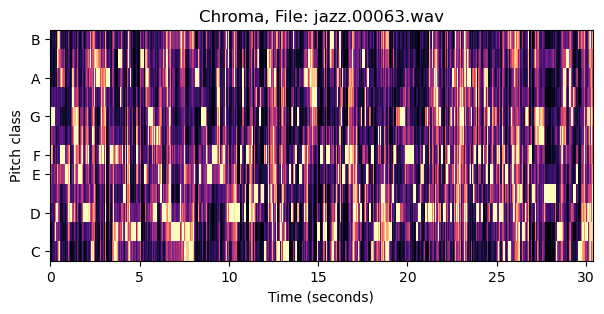

In [7]:
chroma = AudioVisualizer('chroma_stft')
fig = chroma.visualize(audio=example_audio, filename=example_filename, n_chroma=12)
plt.show();

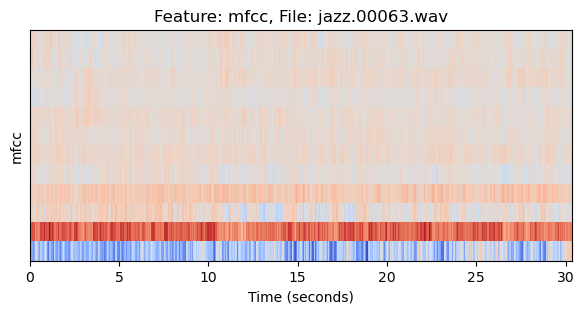

In [8]:
mfcc = AudioVisualizer('mfcc')
fig = mfcc.visualize(audio=example_audio, filename=example_filename, n_mfcc=12)
plt.show();

In [67]:
x = example_audio
sr = sample_rate
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the figure size as needed

# Display the mel spectrogram using librosa.display.specshow()
librosa.display.specshow(mel_spectrogram_db, sr=sr, fmax=8000, ax=ax)

# Remove the axis
plt.axis('off')

# Adjust the layout to minimize the white space
plt.tight_layout()

# Get the current figure as a NumPy array
fig.canvas.draw()
image_np = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_np = image_np.reshape(fig.canvas.get_width_height()[::-1] + (3,))

plt.close(fig)
image_np.shape


C:\Users\zheng\AppData\Local\Temp\ipykernel_26524\3829150910.py:20: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image_np = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


(750000,)

In [38]:
from PIL import Image
import os

path = '../archive/Data/images_original/blues'
images = os.listdir(path)
img = Image.open(os.path.join(path, images[0]))
np.array(img).shape

(288, 432, 4)

In [50]:
img = Image.open('test.png')
np.array(img).shape

(480, 640, 4)

In [43]:
y, sr = librosa.load('../archive/Data/genres_original/blues/blues.00000.wav')
mel_spectrogram = librosa.feature.melspectrogram(y=example_audio, sr=sr)
mel_spectrogram[:, :972].shape


(128, 972)

In [11]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift

# Define a pipeline of augmentation transformations
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.2, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
])

# Apply augmentation to an audio sample
augmented_audio = augment(samples=example_audio, sample_rate=sample_rate)


In [12]:
augmented_audio.shape

(669240,)

In [13]:
example_audio.shape

(669240,)